### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


### Load Dataset

In [3]:
stockx_data = pd.read_csv("stockx.csv",index_col=0)

In [4]:
stockx_data.head()

,Sale Price,Retail Price,Shoe Size,Price_Percentage_change,Days_Since_Release,yeezy,airjordan,airforce,airmax90,airmax97,...,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales
0,1097.0,220,11.0,3.986364,342.0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857
1,685.0,220,11.0,2.113636,282.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560
2,690.0,220,11.0,2.136364,282.0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520
3,1075.0,220,11.5,3.886364,282.0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808
4,828.0,220,11.0,2.763636,202.0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153


### Make Training and Testing Data

In [5]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [6]:
x = stockx_data.drop(['Price_Percentage_change'], axis=1)
y = stockx_data['Price_Percentage_change']

In [7]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101)

In [8]:
from sklearn.metrics import mean_squared_error as mse

### 1. Adaboost Regressor

In [9]:
from sklearn.ensemble import AdaBoostRegressor

In [10]:
#creating an AdaBoost instance
clf = AdaBoostRegressor(random_state=101)
#training the model
clf.fit(train_x,train_y)
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [11]:
rmse_train = np.sqrt(mse(train_y, pred_train))
rmse_test = np.sqrt(mse(test_y, pred_test))

print('Training error:',rmse_train)
print('Testing error:', rmse_test)

Training error: 0.4312209872015135
Testing error: 0.43301937863192247


In [12]:
r2 = r2_score(test_y, pred_test)
print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.918261726652488


## 2. Tuned Adaboost Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor as dt

In [14]:
clf_tuned = AdaBoostRegressor(random_state=96, base_estimator=dt(random_state=101,criterion='squared_error',max_depth=4,max_leaf_nodes=15,min_samples_split=30),n_estimators=200,learning_rate=0.05)

In [15]:

clf_tuned.fit(train_x,train_y)
pred_train=clf_tuned.predict(train_x)
pred_test=clf_tuned.predict(test_x)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [16]:
rmse_train = np.sqrt(mse(train_y, pred_train))
rmse_test = np.sqrt(mse(test_y, pred_test))

print('Training error:',rmse_train)
print('Testing error:', rmse_test)

Training error: 0.17883609331902042
Testing error: 0.18208941576577498


In [17]:
r2 = r2_score(test_y, pred_test)
print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.9855462612921865


## 3. Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
#creating an GradientBoost instance
grb = GradientBoostingRegressor(random_state=101)
#training the model
grb.fit(train_x,train_y)
pred_train=grb.predict(train_x)
pred_test=grb.predict(test_x)

In [21]:
rmse_train = np.sqrt(mse(train_y, pred_train))
rmse_test = np.sqrt(mse(test_y, pred_test))

print('Training error:',rmse_train)
print('Testing error:', rmse_test)

Training error: 0.042280386395123076
Testing error: 0.04553751693811797


In [22]:
r2 = r2_score(test_y, pred_test)
print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.9990960394328116


## 4. XGBoost Regressor

In [23]:
pip install xgboost

In [23]:
import xgboost as xg

In [24]:
#creating an XGBoost instance
xgb = xg.XGBRegressor(random_state=101)
#training the model
xgb.fit(train_x,train_y)
pred_train=xgb.predict(train_x)
pred_test=xgb.predict(test_x)

In [25]:
rmse_train = np.sqrt(mse(train_y, pred_train))
rmse_test = np.sqrt(mse(test_y, pred_test))

print('Training error:',rmse_train)
print('Testing error:', rmse_test)

Training error: 0.03337850983939101
Testing error: 0.07666956383496436


In [26]:
r2 = r2_score(test_y, pred_test)
print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.997437541859571


## Summary

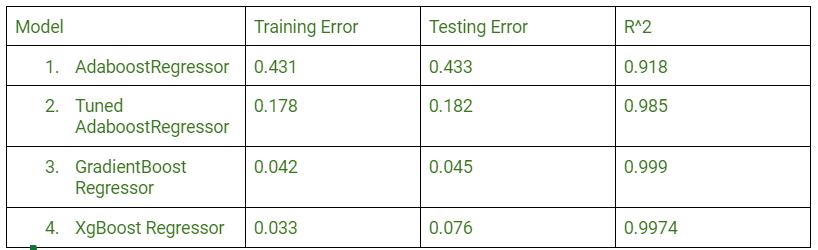

## Conclusion :
**Gradient Boost and Xgboost are doing better even without Hyperparameter Tuning. We can use Gradient Boost Regressor as Testing Error is least i.e it performs the best on  unseen Data**